In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import regex as re
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
## changing dataframe options to go through all the columns and viewing all the content
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 300

In [3]:
## importing the file
df=pd.read_csv('C:\\Users\\laksh\Desktop\\Capstone Project - Laksh\\final.csv')

In [4]:
#checking columns in file
df.columns

Index(['Unnamed: 0', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')

In [5]:
df


,Unnamed: 0,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,https://twitter.com/RedTeslaGirl/status/1520536015521386496,2022-04-30 22:50:10+00:00,@MatthewCisler @tammyharrington Absolutely Matthew! #Tesla's are simply #Amazing - I'll never ever go back to an #ICE #vehicle again! Thank you @elonmusk \n\n@Tesla #WorldLeader in #ElectricVehicles #EVs and #FSD #AutonomousDriving \n\n#TSLA #Investors take note! https://t.co/lXFARvtcRM,@MatthewCisler @tammyharrington Absolutely Matthew! #Tesla's are simply #Amazing - I'll never ever go back to an #ICE #vehicle again! Thank you @elonmusk \n\n@Tesla #WorldLeader in #ElectricVehicles #EVs and #FSD #AutonomousDriving \n\n#TSLA #Investors take note! https://t.co/lXFARvtcRM,1.520540e+18,"{'username': 'RedTeslaGirl', 'id': 1330234773562925058, 'displayname': 'Tesla FSD BetaTester Version 10.11.2 - 2022 4.5.21', 'description': '#Tesla #Owner #Investor #TSLA Long\n\nRetired #USAF #DisabledVet Promote/Support #STEM/#STEAM Non-Profits #NASASocial Alumna #SpaceX #ULA #KSC', 'rawDescri...",0,0,2,0,1.519930e+18,en,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",https://mobile.twitter.com,Twitter Web App,NaN,NaN,"[{'thumbnailUrl': 'https://pbs.twimg.com/tweet_video_thumb/FRoHcciXsAA0gFP.jpg', 'variants': [{'contentType': 'video/mp4', 'url': 'https://video.twimg.com/tweet_video/FRoHcciXsAA0gFP.mp4', 'bitrate': 0}]}]",NaN,NaN,1.520000e+18,"{'username': 'MatthewCisler', 'id': 2441039102, 'displayname': 'Matthew Cisler', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': N...","[{'username': 'MatthewCisler', 'id': 2441039102, 'displayname': 'Matthew Cisler', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': ...",NaN,NaN,"['Tesla', 'Amazing', 'ICE', 'vehicle', 'WorldLeader', 'ElectricVehicles', 'EVs', 'FSD', 'AutonomousDriving', 'TSLA', 'Investors']",NaN
1,1,https://twitter.com/investoradel/status/1520535808993726464,2022-04-30 22:49:21+00:00,whats your number one over-valued stock? \n\nmine is #TSLA and #nvda,whats your number one over-valued stock? \n\nmine is #TSLA and #nvda,1.520540e+18,"{'username': 'investoradel', 'id': 1357422628009558021, 'displayname': 'Options Investor', 'description': 'Patience patience patience\nTSLA BEAR \nCRASH COMING SOON', 'rawDescription': 'Patience patience patience\nTSLA BEAR \nCRASH COMING SOON', 'descriptionUrls': None, 'verified': False, 'creat...",0,1,0,0,1.520540e+18,en,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",https://mobile.twitter.com,Twitter Web App,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['TSLA', 'nvda']",NaN
2,2,https://twitter.com/TimofeyD2/status/1520535715381227521,2022-04-30 22:48:59+00:00,“LUNA” - the headsup phone mount/charger! #mounger #tsla #tesla #ElonMusk,“LUNA” - the headsup phone mount/charger! #mounger #tsla #tesla #ElonMusk,1.520540e+18,"{'username': 'TimofeyD2', 'id': 1217844247367421953, 'displayname': 'Timofey D', 'description': 'Life enthusiast', 'rawDescription': 'Life enthusiast', 'descriptionUrls': None, 'verified': False, 'created': datetime.datetime(2020, 1, 16, 16, 21, 24, tzinfo=datetime.timezone.utc), 'followersCount...",0,0,2,0,1.520540e+18,en,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['mounger', 'tsla', 'tesla', 'ElonMusk']",NaN
3,3,https://twitter.com/TimofeyD2/status/1520534042

In [6]:
# descriptive analytics for numeric values
df.dtypes

Unnamed: 0            int64
url                  object
date                 object
content              object
renderedContent      object
id                  float64
user                 object
replyCount            int64
retweetCount          int64
likeCount             int64
quoteCount            int64
conversationId      float64
lang                 object
source               object
sourceUrl            object
sourceLabel          object
outlinks             object
tcooutlinks          object
media                object
retweetedTweet      float64
quotedTweet          object
inReplyToTweetId    float64
inReplyToUser        object
mentionedUsers       object
coordinates          object
place                object
hashtags             object
cashtags             object
dtype: object

In [7]:
# descriptive analytics for object  values
df.describe(include=object)

,url,date,content,renderedContent,user,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,quotedTweet,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
count,157559,157559,157559,157559,157559,157559,157559,157559,157559,69514,69514,46703,8473,18377,37314,2378,2377,157483,31113
unique,152310,148207,137561,136318,35453,26,520,430,520,37054,39271,43862,7643,9164,17668,920,866,40782,4067
top,https://twitter.com/luke_sosnowski/status/1482734878135402498,2021-09-17 00:10:00+00:00,do re me fa so done with you #music #fb #facebook,"The_Hard_Ponys just uploaded a new song titled ""I Lied"". You can check it out at musicfast.com/The_Hard_Ponys #fb","{'username': 'SignalFactory', 'id': 54227657, 'displayname': 'Signal Factory', 'description': 'Signal Factory provides a bridge between Forex signal providers and Forex traders that are looking for real time advice', 'rawDescription': 'Signal Factory provides a bridge between Forex signal provid...",en,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",http://twitter.com/download/iphone,Twitter for iPhone,['https://bit.ly/91urwrd'],['https://t.co/gAloIO6Q7s'],"[{'previewUrl': 'https://pbs.twimg.com/media/ChTDgUeWIAAaUsG?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/ChTDgUeWIAAaUsG?format=jpg&name=large'}]","{'url': 'https://twitter.com/CashApp/status/1390698245970616320', 'date': datetime.datetime(2021, 5, 7, 16, 1, 14, tzinfo=datetime.timezone.utc), 'content': 'We’re giving away $5,000 in stock for #CashAppFriday. RT with your $cashtag and a company you vibe with for a chance to win. \n\nhttps://t...","{'username': 'elonmusk', 'id': 44196397, 'displayname': 'Elon Musk', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaC...","[{'username': 'elonmusk', 'id': 44196397, 'displayname': 'Elon Musk', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'media...","{'longitude': -72.92308028, 'latitude': 41.3115651}","{'fullName': 'New Haven, CT', 'name': 'New Haven', 'type': 'city', 'country': 'United States', 'countryCode': 'US'}",['fb'],['TSLA']
freq,5,10,499,525,7427,157079,36182,36182,36182,1963,1658,192,24,683,2914,105,105,26617,11232


In [8]:
#checking the duplicates values in the dataset
df.duplicated().sum()

0

In [9]:
#displaying all the columns in the dataset
df.columns

Index(['Unnamed: 0', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')

In [10]:
subset=['date', 'user','content','replyCount', 'retweetCount', 'likeCount', 'quoteCount','lang','sourceLabel','hashtags']

In [11]:
## selecting the columns for the analysis
df1=df[subset]

In [12]:
df1

,date,user,content,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,hashtags
0,2022-04-30 22:50:10+00:00,"{'username': 'RedTeslaGirl', 'id': 1330234773562925058, 'displayname': 'Tesla FSD BetaTester Version 10.11.2 - 2022 4.5.21', 'description': '#Tesla #Owner #Investor #TSLA Long\n\nRetired #USAF #DisabledVet Promote/Support #STEM/#STEAM Non-Profits #NASASocial Alumna #SpaceX #ULA #KSC', 'rawDescri...",@MatthewCisler @tammyharrington Absolutely Matthew! #Tesla's are simply #Amazing - I'll never ever go back to an #ICE #vehicle again! Thank you @elonmusk \n\n@Tesla #WorldLeader in #ElectricVehicles #EVs and #FSD #AutonomousDriving \n\n#TSLA #Investors take note! https://t.co/lXFARvtcRM,0,0,2,0,en,Twitter Web App,"['Tesla', 'Amazing', 'ICE', 'vehicle', 'WorldLeader', 'ElectricVehicles', 'EVs', 'FSD', 'AutonomousDriving', 'TSLA', 'Investors']"
1,2022-04-30 22:49:21+00:00,"{'username': 'investoradel', 'id': 1357422628009558021, 'displayname': 'Options Investor', 'description': 'Patience patience patience\nTSLA BEAR \nCRASH COMING SOON', 'rawDescription': 'Patience patience patience\nTSLA BEAR \nCRASH COMING SOON', 'descriptionUrls': None, 'verified': False, 'creat...",whats your number one over-valued stock? \n\nmine is #TSLA and #nvda,0,1,0,0,en,Twitter Web App,"['TSLA', 'nvda']"
2,2022-04-30 22:48:59+00:00,"{'username': 'TimofeyD2', 'id': 1217844247367421953, 'displayname': 'Timofey D', 'description': 'Life enthusiast', 'rawDescription': 'Life enthusiast', 'descriptionUrls': None, 'verified': False, 'created': datetime.datetime(2020, 1, 16, 16, 21, 24, tzinfo=datetime.timezone.utc), 'followersCount...",“LUNA” - the headsup phone mount/charger! #mounger #tsla #tesla #ElonMusk,0,0,2,0,en,Twitter for iPhone,"['mounger', 'tsla', 'tesla', 'ElonMusk']"
3,2022-04-30 22:42:20+00:00,"{'username': 'TimofeyD2', 'id': 1217844247367421953, 'displayname': 'Timofey D', 'description': 'Life enthusiast', 'rawDescription': 'Life enthusiast', 'descriptionUrls': None, 'verified': False, 'created': datetime.datetime(2020, 1, 16, 16, 21, 24, tzinfo=datetime.timezone.utc), 'followersCount...","“Mounger” didn’t exist, it just born! #mounger #tsla #tesla #ElonMusk",0,0,3,0,en,Twitter for iPhone,"['mounger', 'tsla', 'tesla', 'ElonMusk']"
4,2022-04-30 22:26:03+00:00,"{'username': 'LeeTyler', 'id': 16193678, 'displayname': 'LeeTyler', 'description': 'Environmentalist, natural health researcher, raise property value. call me 917.282.6285', 'rawDescription': 'Environmentalist, natural health researcher, raise property value. call me 917.282.6285', 'descriptionU...","Elon Musk May Reportedly Charge for Some Twitter Features #TSLA #ElonMusk #Tesla #Sustainability #SDGs [Video]: Elon Musk is reportedly considering charging one of Twitter's most basic features. Earlier this month, Elon Musk made the move to purchase… https://t.co/j26EXUv4my https://t.co/pV0TdMpaXy",0,0,0,0,en,dlvr.it,"['TSLA', 'ElonMusk', 'Tesla', 'Sustainability', 'SDGs']"
...,...,...,...,...,...,...,...,...,...,...
157554,2021-05-01 00:59:33+00:00,"{'username': 'tudor_jacob', 'id': 4503158892, 'displayname': 'Jacob Tudor', 'description': 'Current Pre-Med student, ISU. \nInsurance Agent\nHealth&Fitness Coach', 'rawDescription': 'Current Pre-Med student, ISU. \nInsurance Agent\nHealth&Fitness Coach', 'descriptionUrls': None, 'verified': Fals...","HumanProgress: Efforts to curtail CO2 emissions are out of place in poor countries, where cheap energy is still a distant dream.\nhttps://t.co/nn8mB8rGMw Good things happening.#fb",0,0,0,0,en,IFTTT,['fb']
157555,2021-05-01 00:39:41+00:00,"{'username': 'QS2Point', 'id': 3018375669, 'displayname': 'QS2 Point', 'description': 'By providing exceptional solutions, exceptional talent, and best practices, we help you to leverage technology to accomplish your business goals', 'rawDescription': 'By providing exceptional solutions, excepti...","Apple's AR Spaces, Facebook's AR Future, Snap's 3D Acquisition, &amp; Campfire AR Headset Launch\nhttps://

In [13]:
# checking the null values in the dataset
df1.isnull().sum()

date             0
user             0
content          0
replyCount       0
retweetCount     0
likeCount        0
quoteCount       0
lang             0
sourceLabel      0
hashtags        76
dtype: int64

In [14]:
# dropping the null values, correspocing to hashtags values that are null
df1.dropna(inplace=True)

In [15]:
#checking the null values
df1.isnull().sum()

date            0
user            0
content         0
replyCount      0
retweetCount    0
likeCount       0
quoteCount      0
lang            0
sourceLabel     0
hashtags        0
dtype: int64

In [16]:
# checking the datatypes of values
df1.dtypes

date            object
user            object
content         object
replyCount       int64
retweetCount     int64
likeCount        int64
quoteCount       int64
lang            object
sourceLabel     object
hashtags        object
dtype: object

In [17]:
#checking date column to date time

df1['date']= pd.to_datetime(df1['date'])

In [18]:
## splitting date into day,month and year
df1['day']=df1['date'].dt.day
df1['month']=df1['date'].dt.month
df1['year']=df1['date'].dt.year

In [19]:
df1

,date,user,content,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,hashtags,day,month,year
0,2022-04-30 22:50:10+00:00,"{'username': 'RedTeslaGirl', 'id': 1330234773562925058, 'displayname': 'Tesla FSD BetaTester Version 10.11.2 - 2022 4.5.21', 'description': '#Tesla #Owner #Investor #TSLA Long\n\nRetired #USAF #DisabledVet Promote/Support #STEM/#STEAM Non-Profits #NASASocial Alumna #SpaceX #ULA #KSC', 'rawDescri...",@MatthewCisler @tammyharrington Absolutely Matthew! #Tesla's are simply #Amazing - I'll never ever go back to an #ICE #vehicle again! Thank you @elonmusk \n\n@Tesla #WorldLeader in #ElectricVehicles #EVs and #FSD #AutonomousDriving \n\n#TSLA #Investors take note! https://t.co/lXFARvtcRM,0,0,2,0,en,Twitter Web App,"['Tesla', 'Amazing', 'ICE', 'vehicle', 'WorldLeader', 'ElectricVehicles', 'EVs', 'FSD', 'AutonomousDriving', 'TSLA', 'Investors']",30,4,2022
1,2022-04-30 22:49:21+00:00,"{'username': 'investoradel', 'id': 1357422628009558021, 'displayname': 'Options Investor', 'description': 'Patience patience patience\nTSLA BEAR \nCRASH COMING SOON', 'rawDescription': 'Patience patience patience\nTSLA BEAR \nCRASH COMING SOON', 'descriptionUrls': None, 'verified': False, 'creat...",whats your number one over-valued stock? \n\nmine is #TSLA and #nvda,0,1,0,0,en,Twitter Web App,"['TSLA', 'nvda']",30,4,2022
2,2022-04-30 22:48:59+00:00,"{'username': 'TimofeyD2', 'id': 1217844247367421953, 'displayname': 'Timofey D', 'description': 'Life enthusiast', 'rawDescription': 'Life enthusiast', 'descriptionUrls': None, 'verified': False, 'created': datetime.datetime(2020, 1, 16, 16, 21, 24, tzinfo=datetime.timezone.utc), 'followersCount...",“LUNA” - the headsup phone mount/charger! #mounger #tsla #tesla #ElonMusk,0,0,2,0,en,Twitter for iPhone,"['mounger', 'tsla', 'tesla', 'ElonMusk']",30,4,2022
3,2022-04-30 22:42:20+00:00,"{'username': 'TimofeyD2', 'id': 1217844247367421953, 'displayname': 'Timofey D', 'description': 'Life enthusiast', 'rawDescription': 'Life enthusiast', 'descriptionUrls': None, 'verified': False, 'created': datetime.datetime(2020, 1, 16, 16, 21, 24, tzinfo=datetime.timezone.utc), 'followersCount...","“Mounger” didn’t exist, it just born! #mounger #tsla #tesla #ElonMusk",0,0,3,0,en,Twitter for iPhone,"['mounger', 'tsla', 'tesla', 'ElonMusk']",30,4,2022
4,2022-04-30 22:26:03+00:00,"{'username': 'LeeTyler', 'id': 16193678, 'displayname': 'LeeTyler', 'description': 'Environmentalist, natural health researcher, raise property value. call me 917.282.6285', 'rawDescription': 'Environmentalist, natural health researcher, raise property value. call me 917.282.6285', 'descriptionU...","Elon Musk May Reportedly Charge for Some Twitter Features #TSLA #ElonMusk #Tesla #Sustainability #SDGs [Video]: Elon Musk is reportedly considering charging one of Twitter's most basic features. Earlier this month, Elon Musk made the move to purchase… https://t.co/j26EXUv4my https://t.co/pV0TdMpaXy",0,0,0,0,en,dlvr.it,"['TSLA', 'ElonMusk', 'Tesla', 'Sustainability', 'SDGs']",30,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157554,2021-05-01 00:59:33+00:00,"{'username': 'tudor_jacob', 'id': 4503158892, 'displayname': 'Jacob Tudor', 'description': 'Current Pre-Med student, ISU. \nInsurance Agent\nHealth&Fitness Coach', 'rawDescription': 'Current Pre-Med student, ISU. \nInsurance Agent\nHealth&Fitness Coach', 'descriptionUrls': None, 'verified': Fals...","HumanProgress: Efforts to curtail CO2 emissions are out of place in poor countries, where cheap energy is still a distant dream.\nhttps://t.co/nn8mB8rGMw Good things happening.#fb",0,0,0,0,en,IFTTT,['fb'],1,5,2021
157555,2021-05-01 00:39:41+00:00,"{'username': 'QS2Point', 'id': 3018375669, 'displayname': 'QS2 Point', 'description': 'By providing exceptional solutions, exceptional talent, and best practices, we help you to leverage technology to accomplish your business goals', 'rawDescription': 'By providing exceptional solutions, excepti...","Apple's AR Spaces, F

In [20]:
##selecting financial tweets and storing it in df2
idx1 = df1.content.str.contains(r'Stock|stock|finance|investment|shares|stocks|stocksmarket|stockmarket|fintech|price|NASDAQ|rate', flags=re.IGNORECASE,na=False, regex=True)
df2=df1[idx1]

In [21]:
## financial tweets dataset shape
df2.shape


(26277, 13)

In [22]:
df2

,date,user,content,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,hashtags,day,month,year
1,2022-04-30 22:49:21+00:00,"{'username': 'investoradel', 'id': 1357422628009558021, 'displayname': 'Options Investor', 'description': 'Patience patience patience\nTSLA BEAR \nCRASH COMING SOON', 'rawDescription': 'Patience patience patience\nTSLA BEAR \nCRASH COMING SOON', 'descriptionUrls': None, 'verified': False, 'creat...",whats your number one over-valued stock? \n\nmine is #TSLA and #nvda,0,1,0,0,en,Twitter Web App,"['TSLA', 'nvda']",30,4,2022
7,2022-04-30 22:05:22+00:00,"{'username': 'marc_vinson', 'id': 2228075822, 'displayname': 'M Vinson ⏫⏺⏫⏫ 🇺🇦', 'description': 'Behav Econ & Soc Psych PhDs, LSE. GA raised, CLE adopted + 12 yrs in UK. Lomg time Big 3 Firm, 8 yrs Foundation exec. Rabid CLE, ATL, UGA fan. WFU obligated', 'rawDescription': 'Behav Econ & Soc Psy...","@Peter1971 @elkiemom @bc35bcer_ @KathyHutson1 @hugolowell @RogerStoneUSA Nice, Peter. If only all of Twitter were so... normal. The deal's target is ~early-October (demand from Musk to hit pre-mid-terms?). BUT, there's a $1B, mutual walkway clause.\n\nAll a smokescreen for #Egolon to dump overpr...",1,0,1,0,en,Twitter for Android,"['Egolon', 'TSLA']",30,4,2022
9,2022-04-30 21:03:05+00:00,"{'username': 'VipLiveAlerts', 'id': 1238083708030156807, 'displayname': 'VipLiveAlerts-Pro', 'description': 'viplivealerts-pro.com is powering the retail-trader wealth movement, using AI & quantitative data points to revolutionize investment possibilities.', 'rawDescription': 'https://t.co/JYw9J...",https://t.co/H7UDtdLkQj \nMake Your Cash Work Harder as Interest Rates Rise. #Wealth #Money #Stocks #Investing #InvestorsNews #AMC #GME #AMZN #TWTR #TSLA #ATER #BBIG #CEI https://t.co/g9ztYRzitb https://t.co/p6FWafSIJ1,0,0,1,1,en,AdvisorStream v2,"['Wealth', 'Money', 'Stocks', 'Investing', 'InvestorsNews', 'AMC', 'GME', 'AMZN', 'TWTR', 'TSLA', 'ATER', 'BBIG', 'CEI']",30,4,2022
10,2022-04-30 21:00:54+00:00,"{'username': 'TradingSense_', 'id': 1509547105613922308, 'displayname': 'TradingSense', 'description': 'TradingSense is an LTSM that Analyzes the Crypto Market using Machine Learning | Python Developer | @CompTIA Certified', 'rawDescription': 'TradingSense is an LTSM that Analyzes the Crypto M...",$TSLA PREDICTION-🟥\n\nTomorrows Predicted Price : 860.83 | 2022-05-02\n \nCurrent Price: 870.76 \n$TSLA Predicted to Decrease By: 1.14%\n#TSLA #stockalert #Nasdaq #Stocks https://t.co/azezv390GE,0,2,3,0,en,StockTRXK,"['TSLA', 'stockalert', 'Nasdaq', 'Stocks']",30,4,2022
14,2022-04-30 20:18:30+00:00,"{'username': 'HamzeiAnalytics', 'id': 31001654, 'displayname': 'Fari Hamzei', 'description': '#NQ_F Futures Trader, Ranked #1 Stock Market Timer of the Decade, Author of Master Traders. Princeton & UCLA AGSM. Admin@HamzeiAnalytics.com (310) 306-1200', 'rawDescription': '#NQ_F Futures Trader, R...","Note #TWTR only made $52MM (after accounting for stock awards...all paper, no cash) in TTM\n\nSo with $52Mil, there is no way the Company can service $13Bil in debt Elon will put on TWTR balance sheet\n\nSo EM most likely will be forced to sell more of his #TSLA stock to service debt https://t.c...",0,0,7,0,en,Twitter for Android,"['TWTR', 'TSLA']",30,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157456,2021-05-01 11:59:16+00:00,"{'username': 'normanwlucas', 'id': 115983695, 'displayname': 'Norman ""totally vaccinated"" Lucas', 'description': ""Norman Lucas: a Christian who recalls that the phrase 'bleeding heart liberal' refers to the heart of Jesus. Also co-creator of Audra, Allison, Jerid & Jenna"", 'rawDescription': ""No...",Is it Friday yet? Friday this week is Nat'l Tuba Day. I will celebrate with some tuba playing! What about you? #fb,0,0,0,0,en,IFTTT,['fb'],1,5,2021
157475,2021-05-01 11:11:58+00:00,"{'username': 'drmikemurdock', 'id': 67547268, 'displayname': 'Dr. Mike Murdock', 'description': 'WATCH ME LIVE 12p..cst DAILY on FACEBOOK INSTAGRAM YOUTUBE TWITTER …Over

In [23]:
df2.columns

Index(['date', 'user', 'content', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'lang', 'sourceLabel', 'hashtags', 'day', 'month',
       'year'],
      dtype='object')

## Exploratory Data Analysis

In [24]:
import calendar


In [25]:
df2['month'] = df2['month'].apply(lambda x: calendar.month_abbr[x])


In [26]:
look_up = {'Jan': 'January', 'Feb': 'February', 'Mar': 'March', 'Apr': 'April', 'May': 'May',
            'Jun': 'June', 'Jul': 'July', 'Aug': 'August', 'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December'}

df2['month'] = df2['month'].apply(lambda x: look_up[x])

In [27]:
df2['month'].unique()

array(['April', 'March', 'February', 'January', 'December', 'November',
       'October', 'September', 'August', 'July', 'June', 'May'],
      dtype=object)

In [28]:
Tesla=df2.hashtags.str.contains(r'tsla', flags=re.IGNORECASE,na=False ,regex=True)
Amazon=df2.hashtags.str.contains(r'AMZN', flags=re.IGNORECASE,na=False ,regex=True)
Facebook=df2.hashtags.str.contains(r'FB', flags=re.IGNORECASE,na=False ,regex=True)
Apple=df2.hashtags.str.contains(r'AAPL', flags=re.IGNORECASE,na=False ,regex=True)
Microsoft=Tesla=df2.hashtags.str.contains(r'MSFT', flags=re.IGNORECASE,na=False ,regex=True)

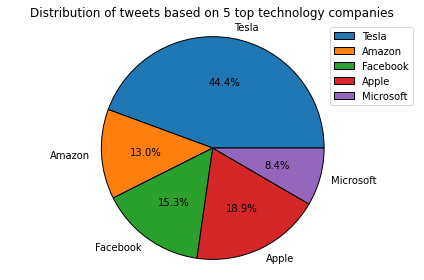

In [29]:
Tesla=df2[df2.hashtags.str.contains(r'tsla', flags=re.IGNORECASE,na=False ,regex=True)].shape[0]
Amazon=df2[df2.hashtags.str.contains(r'AMZN', flags=re.IGNORECASE,na=False ,regex=True)].shape[0]
Facebook=df2[df2.hashtags.str.contains(r'FB', flags=re.IGNORECASE,na=False ,regex=True)].shape[0]
Apple=df2[df2.hashtags.str.contains(r'AAPL', flags=re.IGNORECASE,na=False ,regex=True)].shape[0]
Microsoft=df2[df2.hashtags.str.contains(r'MSFT', flags=re.IGNORECASE,na=False ,regex=True)].shape[0]

slices=[Tesla,Amazon,Facebook,Apple,Microsoft]
labels=['Tesla','Amazon','Facebook','Apple','Microsoft']
plt.pie(slices,labels=labels,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.axis('equal')
plt.title("Distribution of tweets based on 5 top technology companies")
plt.legend() 
plt.tight_layout() ## for default padding
plt.show()




In [30]:
#!pip install -U kaleido

In [31]:
# SourceLabel=pd.DataFrame(label,count).reset_index()
# SourceLabel
# SourceLabel.rename(columns = {'index':'count', 0:'Label'}, inplace = True)
# SourceLabel_Max= SourceLabel[SourceLabel['count']>500]
# SourceLabel_Max

Text(0.5, 1.0, 'Different Famous Sources of Tweets')

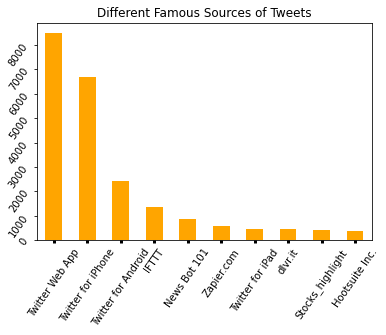

In [32]:
df2['sourceLabel'].value_counts().sort_values(ascending=False)[:10].plot(color='orange',kind='bar')

plt.tick_params(axis='x', colors='black', length=3, width=3)
plt.tick_params(bottom=True,rotation=55)
plt.title('Different Famous Sources of Tweets')




In [33]:
Tesla=df2.hashtags.str.contains(r'tsla', flags=re.IGNORECASE,na=False ,regex=True)
Tesla_data=df2[Tesla]
Amazon=df2.hashtags.str.contains(r'AMZN', flags=re.IGNORECASE,na=False ,regex=True)
Amazon_data=df2[Amazon]
Facebook=df2.hashtags.str.contains(r'FB', flags=re.IGNORECASE,na=False ,regex=True)
Facebook_data=df2[Facebook]
Apple=df2.hashtags.str.contains(r'AAPL', flags=re.IGNORECASE,na=False ,regex=True)
Apple_data=df2[Apple]
Microsoft=Tesla=df2.hashtags.str.contains(r'MSFT', flags=re.IGNORECASE,na=False ,regex=True)
Microsoft_data=df2[Microsoft]

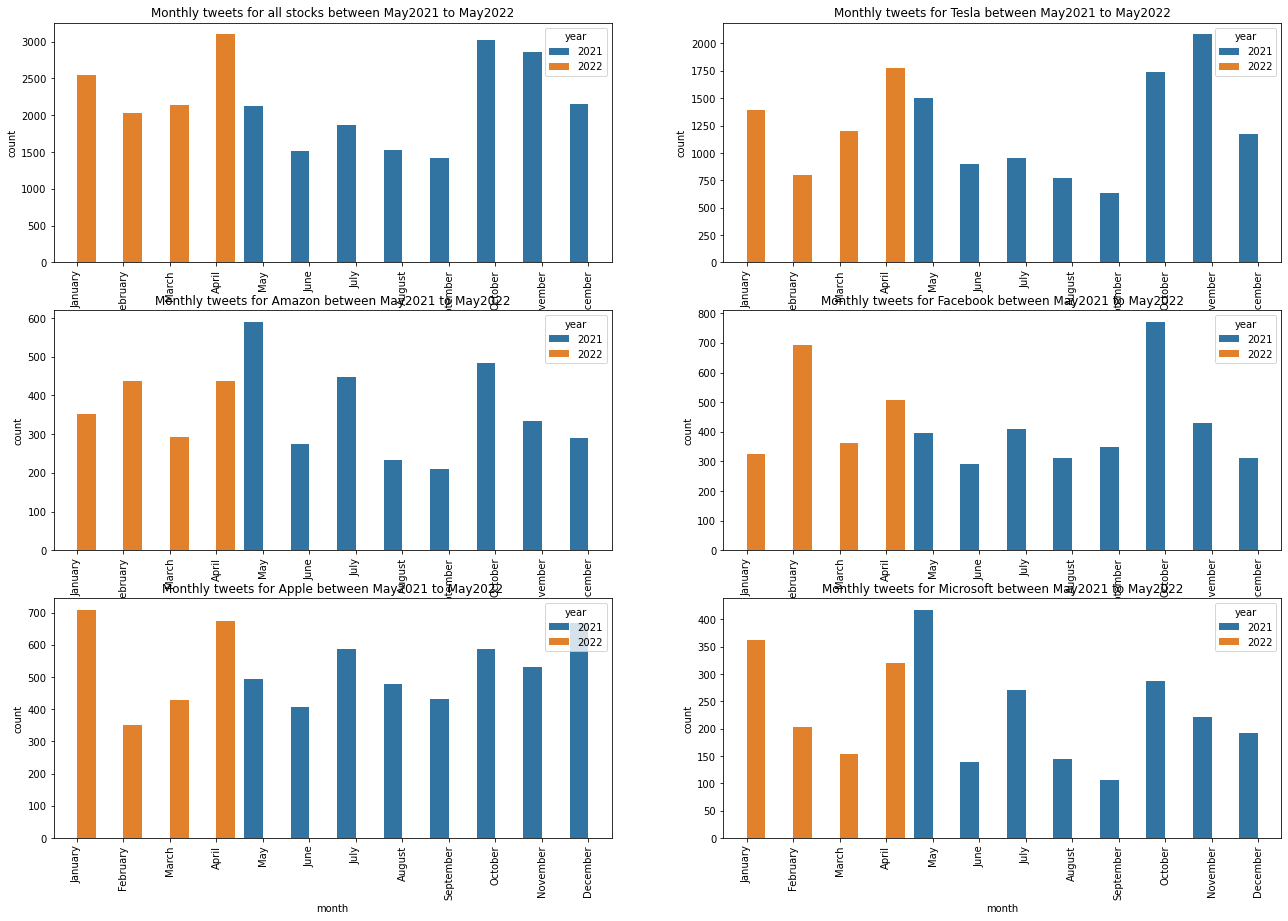

In [34]:
figure, axes = plt.subplots(3,2, sharex=False, figsize=(22,15))
sb.countplot(x='month',hue='year',data=df2,ax=axes[0,0],order=['January','February','March','April','May','June','July','August','September','October','November','December'])
sb.countplot(x='month',hue='year',data=Tesla_data,ax=axes[0,1],order=['January','February','March','April','May','June','July','August','September','October','November','December'])
sb.countplot(x='month',hue='year',data=Amazon_data,ax=axes[1,0],order=['January','February','March','April','May','June','July','August','September','October','November','December'])
sb.countplot(x='month',hue='year',data=Facebook_data,ax=axes[1,1],order=['January','February','March','April','May','June','July','August','September','October','November','December'])
sb.countplot(x='month',hue='year',data=Apple_data,ax=axes[2,0],order=['January','February','March','April','May','June','July','August','September','October','November','December'])
sb.countplot(x='month',hue='year',data=Microsoft_data,ax=axes[2,1],order=['January','February','March','April','May','June','July','August','September','October','November','December'])

#plt.delaxes(ax=axes[2, 1])
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation=90)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation=90)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation=90)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation=90)
axes[2,0].set_xticklabels(axes[2,0].get_xticklabels(),rotation=90)
axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(),rotation=90)

axes[0,0].title.set_text('Monthly tweets for all stocks between May2021 to May2022')
axes[0,1].title.set_text('Monthly tweets for Tesla between May2021 to May2022')
axes[1,0].title.set_text('Monthly tweets for Amazon between May2021 to May2022')
axes[1,1].title.set_text('Monthly tweets for Facebook between May2021 to May2022')
axes[2,0].title.set_text('Monthly tweets for Apple between May2021 to May2022')
axes[2,1].title.set_text('Monthly tweets for Microsoft between May2021 to May2022')

plt.show()


In [35]:
all_tweets=df2.groupby('month').count()['content'].sort_values(ascending=True).to_dict()
print(all_tweets)
Tesla_tweets=Tesla_data.groupby('month').count()['content'].sort_values(ascending=True).to_dict()
print(Tesla_tweets)
Amazon_tweets=Amazon_data.groupby('month').count()['content'].sort_values(ascending=True).to_dict()
print(Amazon_tweets)
Facebook_tweets=Facebook_data.groupby('month').count()['content'].sort_values(ascending=True).to_dict()
print(Facebook_tweets)
Apple_tweets=Apple_data.groupby('month').count()['content'].sort_values(ascending=True).to_dict()
print(Apple_tweets)
Microsoft_tweets=Microsoft_data.groupby('month').count()['content'].sort_values(ascending=True).to_dict()
print(Microsoft_tweets)

{'September': 1413, 'June': 1509, 'August': 1526, 'July': 1867, 'February': 2031, 'May': 2129, 'March': 2134, 'December': 2147, 'January': 2540, 'November': 2852, 'October': 3027, 'April': 3102}
{'September': 634, 'August': 770, 'February': 797, 'June': 898, 'July': 954, 'December': 1177, 'March': 1205, 'January': 1391, 'May': 1502, 'October': 1741, 'April': 1772, 'November': 2086}
{'September': 210, 'August': 233, 'June': 275, 'December': 290, 'March': 292, 'November': 335, 'January': 352, 'April': 436, 'February': 437, 'July': 448, 'October': 483, 'May': 590}
{'June': 290, 'August': 310, 'December': 312, 'January': 325, 'September': 349, 'March': 363, 'May': 396, 'July': 411, 'November': 431, 'April': 507, 'February': 693, 'October': 771}
{'February': 350, 'June': 407, 'March': 430, 'September': 432, 'August': 478, 'May': 494, 'November': 532, 'July': 588, 'October': 588, 'December': 667, 'April': 673, 'January': 709}
{'September': 106, 'June': 139, 'August': 145, 'March': 153, 'Dece

In [36]:
tweets=pd.DataFrame.from_dict([all_tweets])
tweets=tweets.T
tweets.columns=['all_tweets']


In [37]:
tweets['months']= tweets.index

In [38]:
tweets=tweets.reset_index()

In [39]:
tweets=tweets[['all_tweets','months']]
tweets
tweets['months'] = pd.Categorical(tweets.months, categories=['January','February','March','April','May','June','July','August','September','October','November','December'], ordered=True)
tweets=tweets.sort_values('months')
tweets

,all_tweets,months
8,2540,January
4,2031,February
6,2134,March
11,3102,April
5,2129,May
1,1509,June
3,1867,July
2,1526,August
0,1413,September
10,3027,October


In [40]:
T=[]
Am=[]
Ap=[]
F=[]
M=[]
for values in tweets['months']:
    
    T.append(Tesla_tweets[values])
for values in tweets['months']:
    Am.append(Amazon_tweets[values])
for values in tweets['months']:
    Ap.append(Apple_tweets[values])
for values in tweets['months']:
    F.append(Facebook_tweets[values])
for values in tweets['months']:
    M.append(Microsoft_tweets[values])
T
Am
Ap
F
M

[362, 203, 153, 321, 418, 139, 271, 145, 106, 288, 221, 193]

In [41]:
print(T)
print(Am)
print(Ap)
print(F)
print(M)

[1391, 797, 1205, 1772, 1502, 898, 954, 770, 634, 1741, 2086, 1177]
[352, 437, 292, 436, 590, 275, 448, 233, 210, 483, 335, 290]
[709, 350, 430, 673, 494, 407, 588, 478, 432, 588, 532, 667]
[325, 693, 363, 507, 396, 290, 411, 310, 349, 771, 431, 312]
[362, 203, 153, 321, 418, 139, 271, 145, 106, 288, 221, 193]


In [42]:
import numpy as np

In [43]:
tweets['tesla_tweets'] = np.array(T)
tweets['amazon_tweets'] = np.array(Am)
tweets['apple_tweets'] = np.array(Ap)
tweets['microsoft_tweets'] = np.array(M)
tweets['facebook_tweets'] = np.array(F)

tweets

,all_tweets,months,tesla_tweets,amazon_tweets,apple_tweets,microsoft_tweets,facebook_tweets
8,2540,January,1391,352,709,362,325
4,2031,February,797,437,350,203,693
6,2134,March,1205,292,430,153,363
11,3102,April,1772,436,673,321,507
5,2129,May,1502,590,494,418,396
1,1509,June,898,275,407,139,290
3,1867,July,954,448,588,271,411
2,1526,August,770,233,478,145,310
0,1413,September,634,210,432,106,349
10,3027,October,1741,483,588,288,771


In [44]:
tweets.columns

Index(['all_tweets', 'months', 'tesla_tweets', 'amazon_tweets', 'apple_tweets',
       'microsoft_tweets', 'facebook_tweets'],
      dtype='object')

In [45]:
print(tweets['tesla_tweets'].sum())
print(tweets['amazon_tweets'].sum())
print(tweets['apple_tweets'].sum())
print(tweets['microsoft_tweets'].sum())
print(tweets['facebook_tweets'].sum())


14927
4381
6348
2820
5158


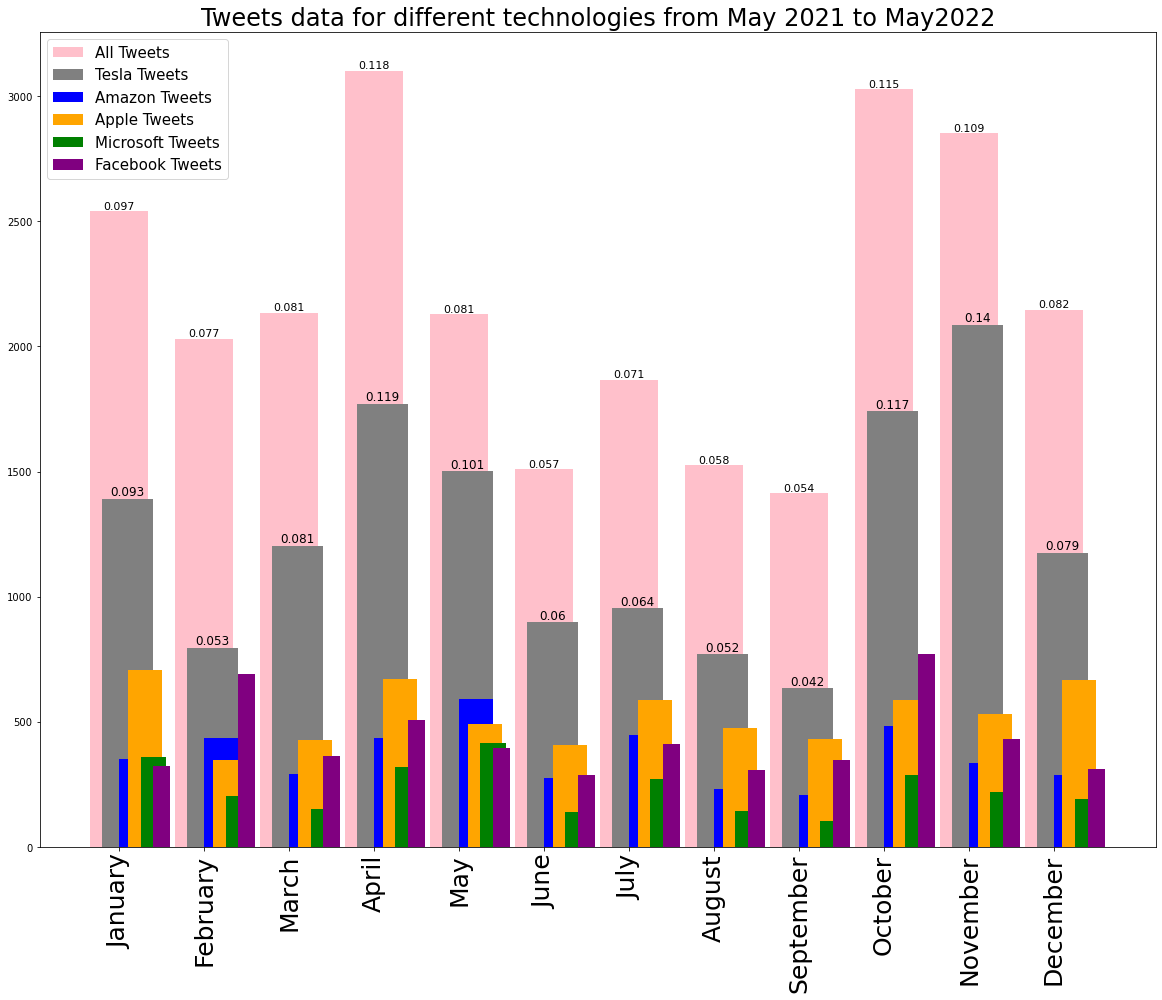

In [46]:
from matplotlib.pyplot import figure

figure(figsize=(20, 15))
x_axis = np.arange(len(tweets['months']))

# Multi bar Chart

p1=plt.bar(x_axis , tweets.all_tweets, width=.68, label = 'All Tweets',color='pink')
p2=plt.bar(x_axis+0.1 , tweets.tesla_tweets, width=0.6, label = 'Tesla Tweets',color='grey')
p3=plt.bar(x_axis+0.1*2 , tweets.amazon_tweets, width=0.4, label = 'Amazon Tweets',color='blue')
p4=plt.bar(x_axis+0.1*3 , tweets.apple_tweets, width=0.4, label = 'Apple Tweets',color='orange')
p5=plt.bar(x_axis+0.1*4 , tweets.microsoft_tweets, width=0.3, label = 'Microsoft Tweets',color='green')
p6=plt.bar(x_axis+0.1*5 , tweets.facebook_tweets, width=0.2, label = 'Facebook Tweets',color='purple')


for rect1 in p1:
        height=rect1.get_height() 
        plt.annotate( "{}".format(round(height/26277,3)),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=11)
        
for rect1 in p2:
        height=rect1.get_height() 
        plt.annotate( "{}".format(round(height/14927,3)),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=12)

#for rect1 in p3:
       # height=rect1.get_height() 
        # plt.annotate( "{}%".format(round(height/4381,3)),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="left",fontsize=11)
        
#for rect1 in p4:
        #height=rect1.get_height() 
        #plt.annotate( "{}%".format(round(height/6348,3)),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="right",fontsize=11)        
        
#for rect1 in p5:
        #height=rect1.get_height() 
        #plt.annotate( "{}%".format(round(height/2820,3)),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="left",fontsize=11)       

#for rect1 in p6:
        #height=rect1.get_height() 
        #plt.annotate( "{}%".format(round(height/5158,3)),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",fontsize=11)


plt.xticks(x_axis,tweets['months'],fontsize=25,rotation=90)



plt.legend(loc=2,prop={'size': 15})
plt.title('Tweets data for different technologies from May 2021 to May2022',fontsize=24)

plt.show()


In [47]:
#df2.to_csv('stock.csv')

In [48]:
#!pip install powerbiclient

## Dashboard Using Power BI


In [49]:
from powerbiclient import Report, models

In [50]:
# Import the DeviceCodeLoginAuthentication class to authenticate against Power BI
from powerbiclient.authentication import DeviceCodeLoginAuthentication

# Initiate device authentication


In [51]:
device_auth = DeviceCodeLoginAuthentication()


Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code FRFHAFZWJ to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [52]:
group_id = "fc36507e-ace1-4be1-b408-40db5bb4f67e"
report_id = "0ee19dfb-ca05-4d62-9755-3bd0640a1bf1"

In [53]:
report1 = Report(group_id=group_id,report_id=report_id, auth=device_auth)


In [54]:
report1

Report()